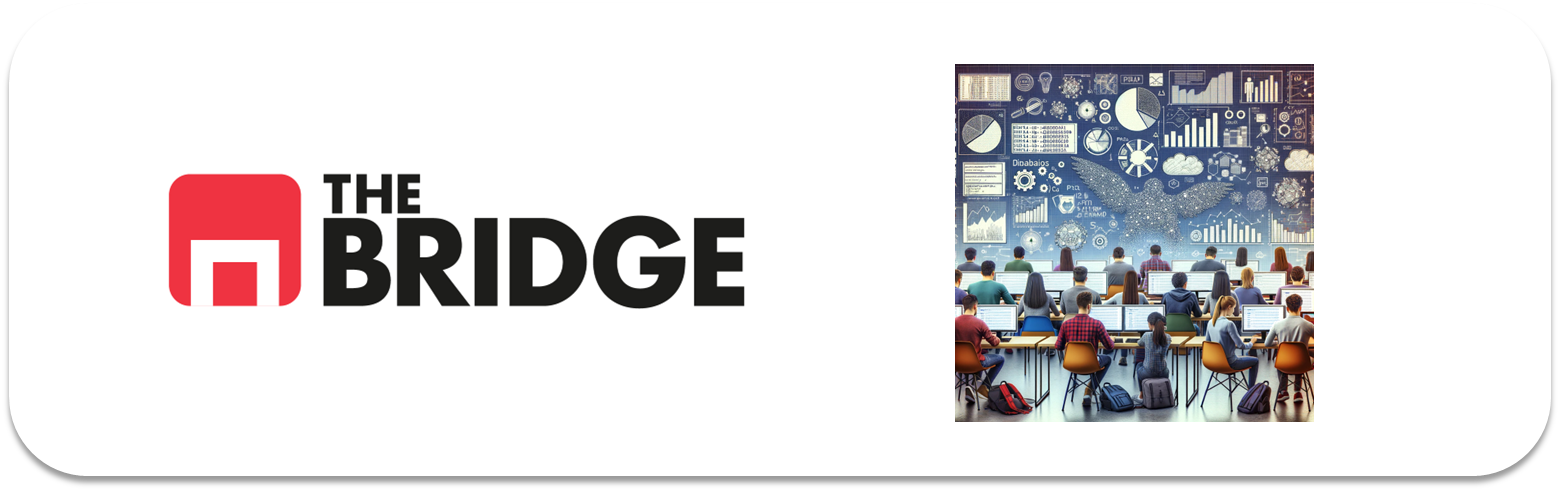

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [603]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [604]:
df_bos = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep= "|")
df_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [605]:
df_bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [606]:
f_num = df_bos.copy().drop(columns= ["MEDV", "CHAS"]).columns.to_list()
f_cat = "CHAS"
target = "MEDV"

<Axes: xlabel='MEDV', ylabel='Count'>

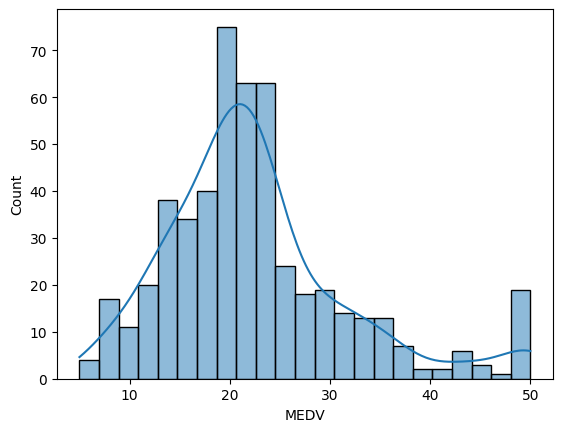

In [607]:
sns.histplot(x= df_bos[target], kde=True)

*No tiene una disposición completamente gaussiana, pero se asemeja, por lo que un regresor lineal podría ser adecuado.*

In [608]:
train, test = train_test_split(df_bos, test_size= 0.2, random_state=42)
X_train = train.copy().drop(columns = target)
y_train = train.copy()[target]
X_test = test.copy().drop(columns = target)
y_test = test.copy()[target]

In [609]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(404, 12) (404,) (102, 12) (102,)


***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

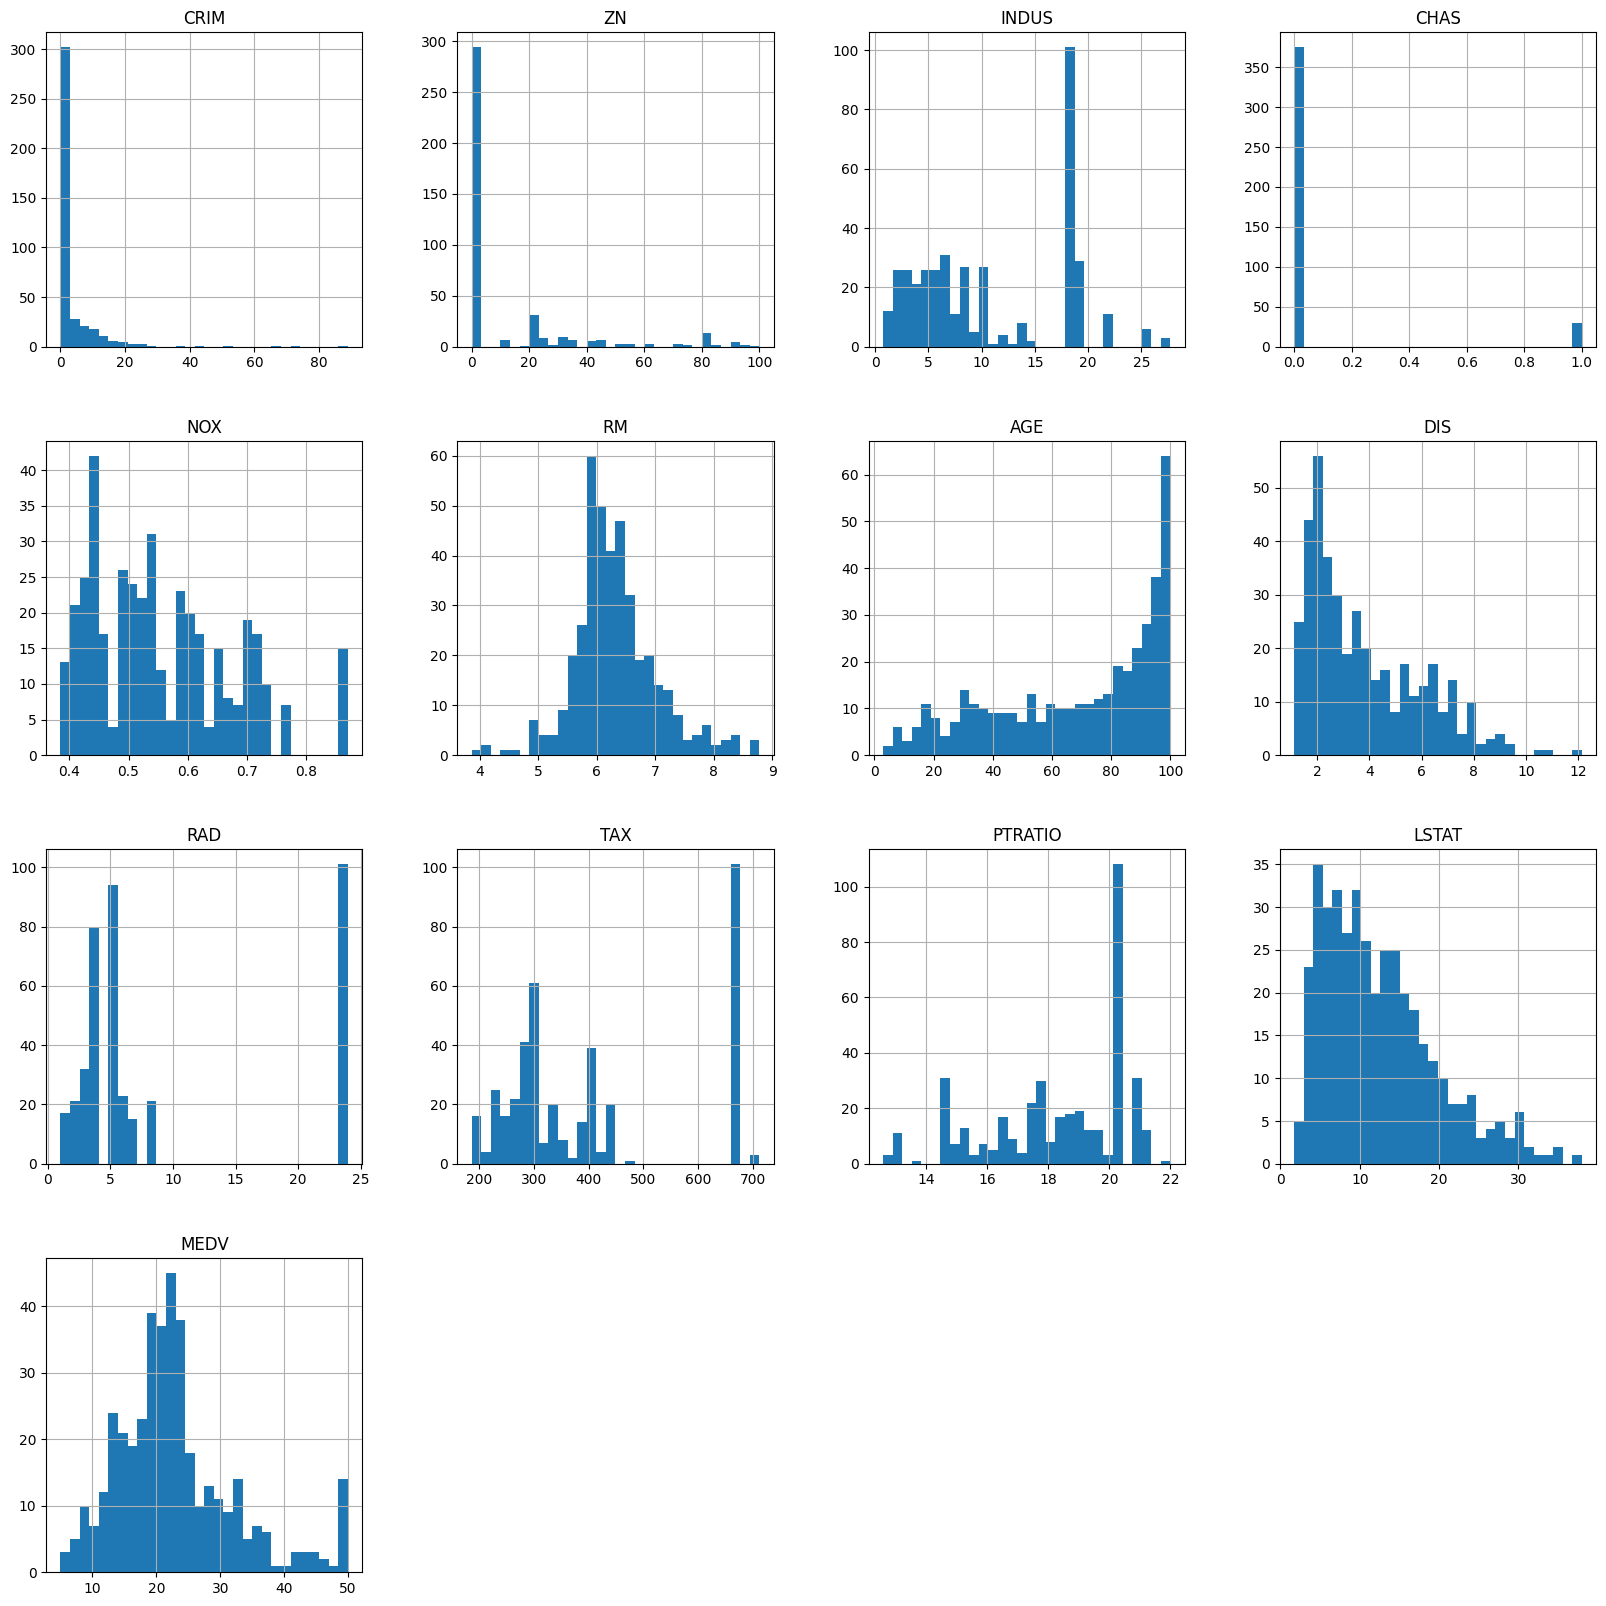

In [610]:
train.hist(figsize=(20,20), bins=30)

In [611]:
df_bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

In [612]:
for col in ['CRIM', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']:
    train[f"{col}_log"] = train[col].apply(np.log)
    test[f"{col}_log"] = test[col].apply(np.log)

array([[<Axes: title={'center': 'CRIM_log'}>,
        <Axes: title={'center': 'INDUS_log'}>,
        <Axes: title={'center': 'AGE_log'}>],
       [<Axes: title={'center': 'DIS_log'}>,
        <Axes: title={'center': 'RAD_log'}>,
        <Axes: title={'center': 'TAX_log'}>],
       [<Axes: title={'center': 'PTRATIO_log'}>,
        <Axes: title={'center': 'LSTAT_log'}>, <Axes: >]], dtype=object)

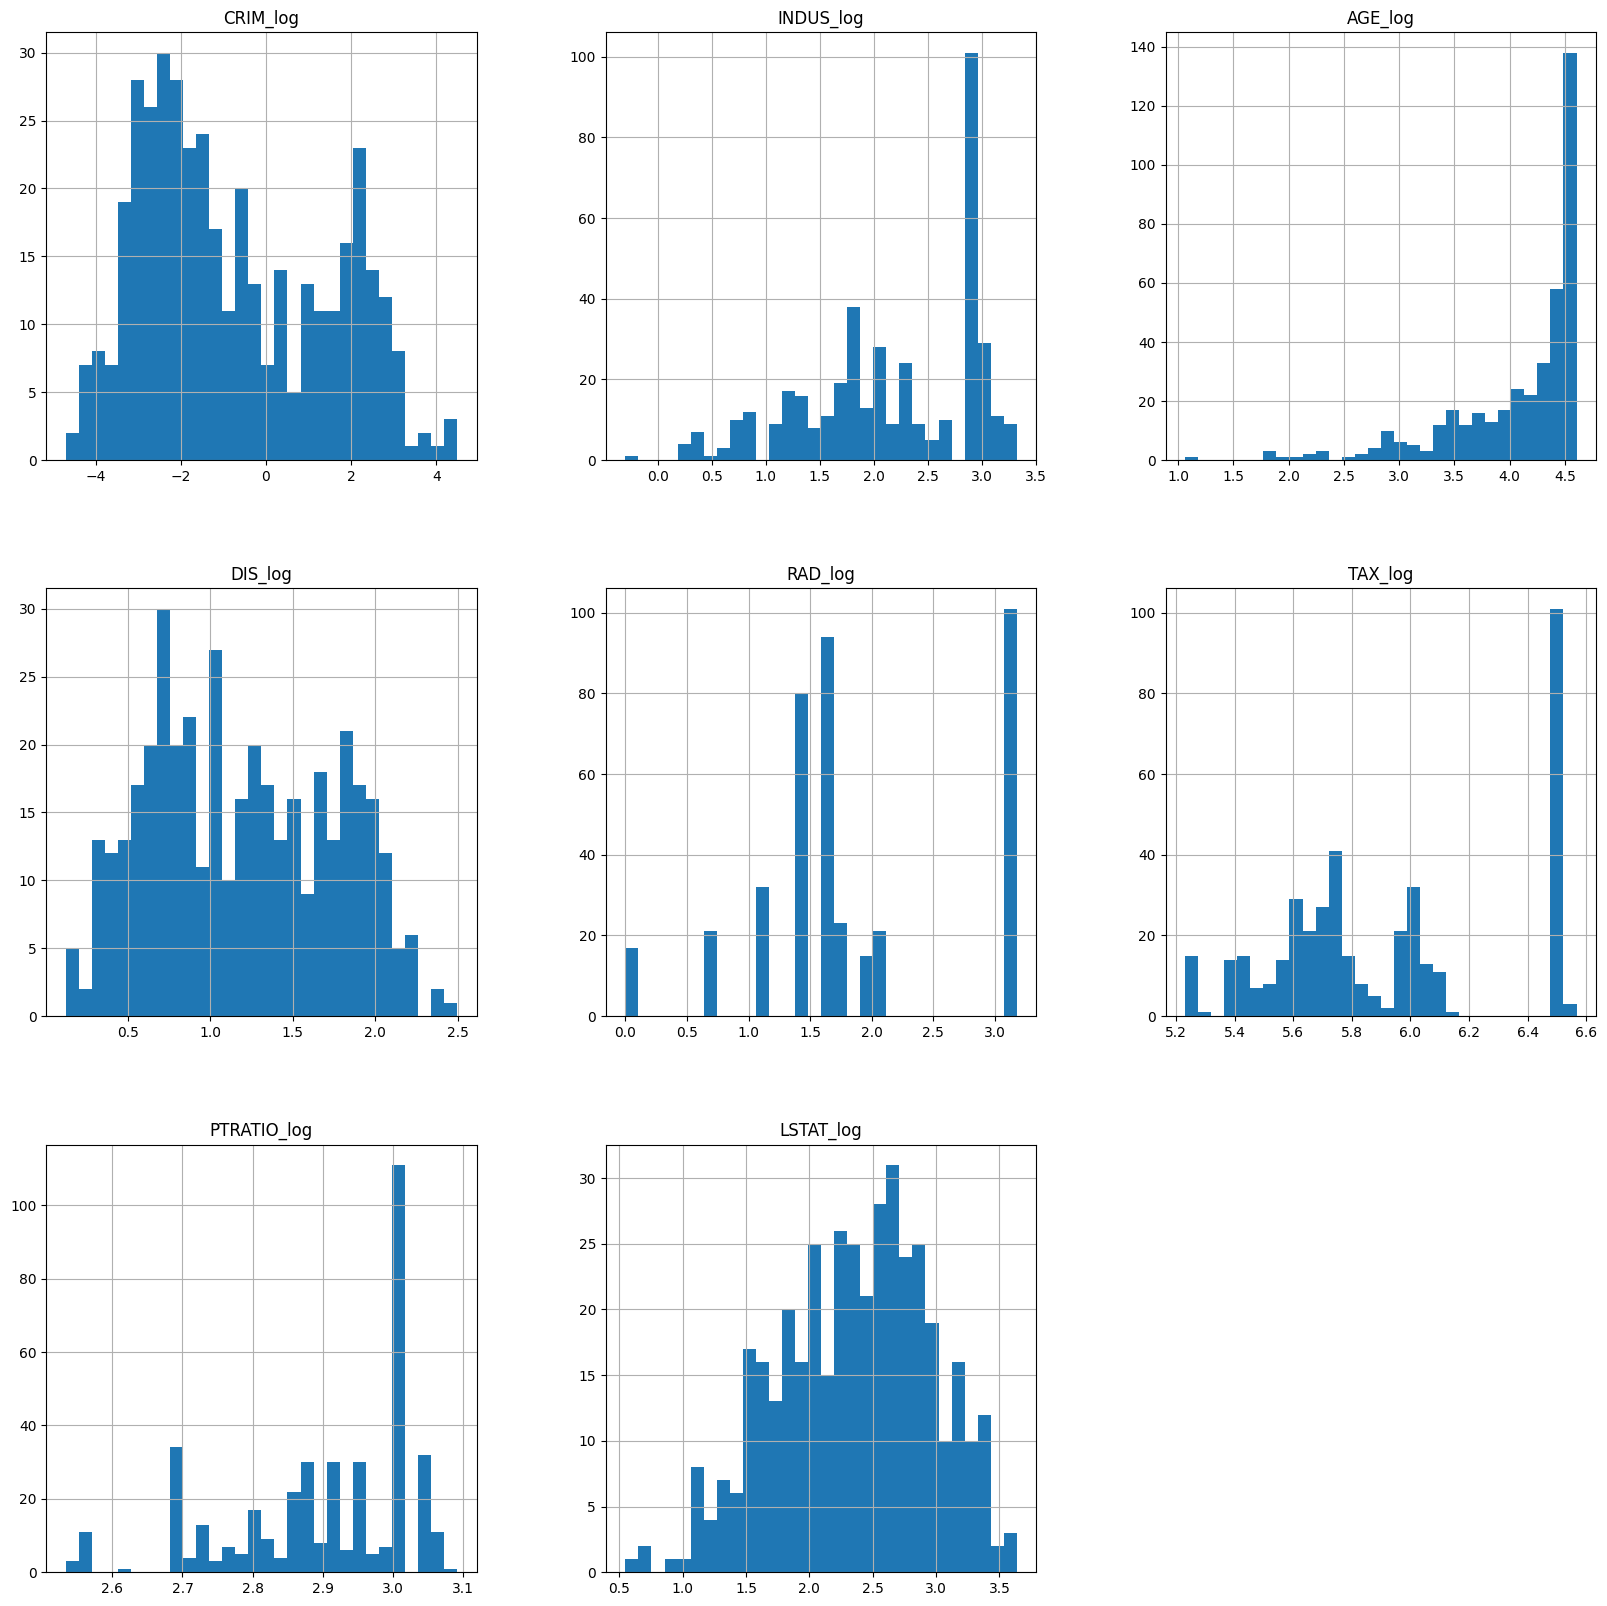

In [613]:
#df_bos.drop(columns=["ZN_log"], inplace=True)
train.loc[:, "CRIM_log":].hist(figsize=(20,20), bins=30)

In [614]:
for col in ['CRIM', 'DIS', 'LSTAT']:
    train[col] = train[f"{col}_log"]
    test[col] = test[f"{col}_log"]
train.drop(columns=train.loc[:, "CRIM_log":].columns.tolist(), inplace=True)
test.drop(columns=test.loc[:, "CRIM_log":].columns.tolist(), inplace=True)

In [615]:
std_scaler = StandardScaler()
for col in f_num:
    train[col] = std_scaler.fit_transform(train[[col]])
    test[col] = std_scaler.fit_transform(test[[col]])



<Axes: >

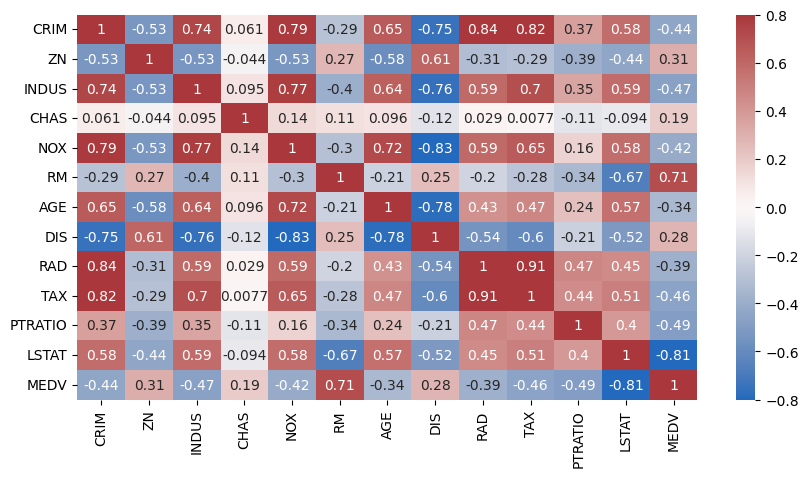

In [616]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),
            vmin = -0.8,
            vmax = 0.8,
            cmap = "vlag",
            annot = True)

*En general hay muchas correlaciones fuertes entre variables del dataset.*   
*Las dos variables con una mayor correlación con la variable target son RM y LSTAT, así que me voy a quedar las dos.*   
*Me voy a deshacer de algunas que tengan una o varias correlaciones muy fuertes, voy a probar con: RAD, DIS, NOX y CRIM, que tienen varias correlaciones muy fuertes.*

<Axes: >

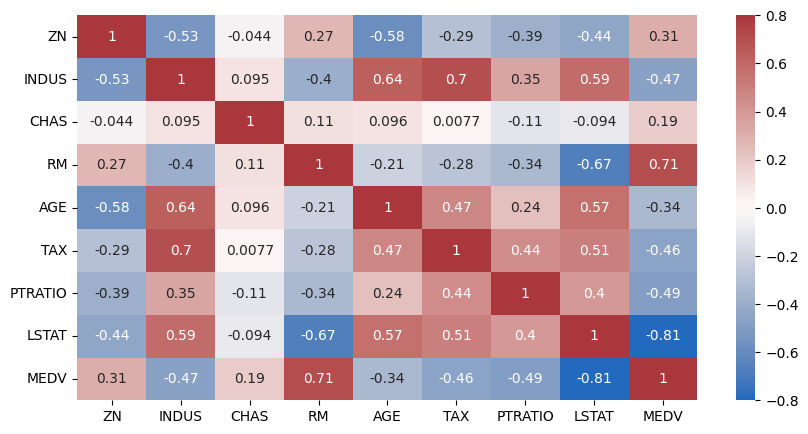

In [617]:
plt.figure(figsize=(10,5))
sns.heatmap(train.drop(columns=["RAD", "DIS", "NOX", "CRIM"]).corr(),
            vmin = -0.8,
            vmax = 0.8,
            cmap = "vlag",
            annot = True)

*Voy a deshacerme también de TAX o INDUS, pero voy a esperar a ver sus coeficientes en el modelo.*

*Habiendo probado con ambas veo que TAX tiene menos peso y pruebo a quitarla y mejora.*

In [618]:
f_num = ['ZN',
 'INDUS',
 'RM',
 'AGE',
 'PTRATIO',
 'LSTAT']

*Después de haber probado solo con las features que se muestran arriba pruebo con todas las variables y da mejor resultado, así que decido probar algunas combinaciones más y la que mejor resultado me ha dado ha sido quitando solo TAX*

In [ ]:
X_train = train.drop(columns=[target, "TAX"])
X_test = test.drop(columns=[target, "TAX"])

lin_reg.fit(X_train, y_train)

LinearRegression()

8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?

In [654]:
lin_reg.intercept_

np.float64(22.602439749857)

In [655]:
df_coef = pd.DataFrame(lin_reg.coef_, index=X_train.columns, columns= ["coeficiente"])
df_coef.sort_values("coeficiente", ascending=False)

,coeficiente
CHAS,2.703943
RM,2.114759
RAD,1.477939
AGE,1.229465
INDUS,0.472300
CRIM,-0.042991
ZN,-0.633798
NOX,-1.049635
TAX,-1.613931
PTRATIO,-1.974344


In [656]:
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_, index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef

,coefs
CRIM,-0.042991
ZN,-0.633798
INDUS,0.472300
CHAS,2.703943
NOX,-1.049635
RM,2.114759
AGE,1.229465
RAD,1.477939
TAX,-1.613931
PTRATIO,-1.974344


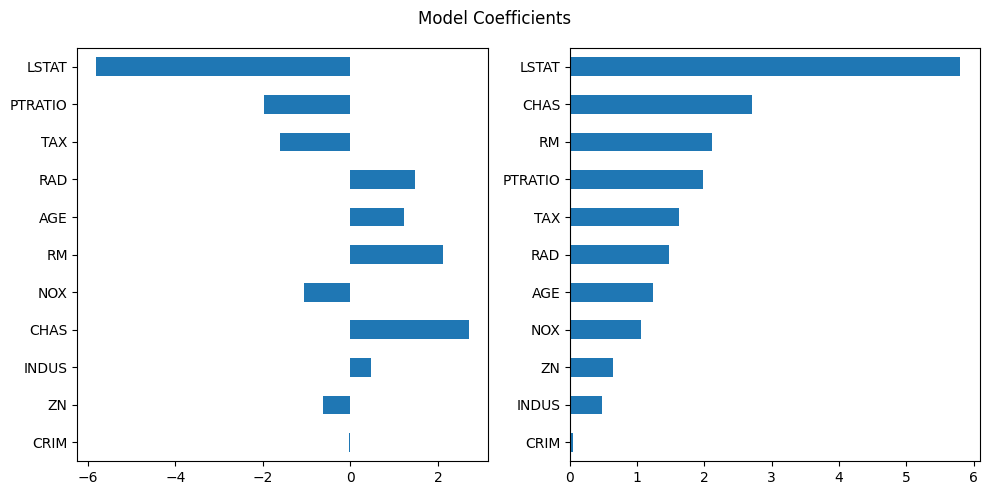

In [657]:
show_coefs(lin_reg)

In [658]:
predicciones_train = lin_reg.predict(X_train)
predicciones_test = lin_reg.predict(X_test)
print("MAE train:", metrics.mean_absolute_error(y_train, predicciones_train))
print("MSE train:", metrics.mean_squared_error(y_train, predicciones_train))
print("RMSE train:", metrics.root_mean_squared_error(y_train, predicciones_train))
print("R2 train:", lin_reg.score(X_train, y_train))

print("MAE test:", metrics.mean_absolute_error(y_test, predicciones_test))
print("MSE train:", metrics.mean_squared_error(y_test, predicciones_test))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test, predicciones_test)))
print("R2 test:", lin_reg.score(X_test, y_test))

MAE train: 3.3676485651738557
MSE train: 20.50419591995367
RMSE train: 4.528155907204794
R2 train: 0.7639761421184823
MAE test: 3.326361454598582
MSE train: 21.319774726250273
RMSE test: 4.617334157958494
R2 test: 0.7092775824800857


*Parece que generaliza bastante bien, aunque tiene un bias relativamente alto.*

In [659]:
df_compara_train = pd.DataFrame(dict(reales_train = y_train.values, pred_train = predicciones_train))
df_compara_test = pd.DataFrame(dict(reales_test = y_test.values, pred_test = predicciones_test))

array([[<Axes: title={'center': 'reales_train'}>,
        <Axes: title={'center': 'pred_train'}>]], dtype=object)

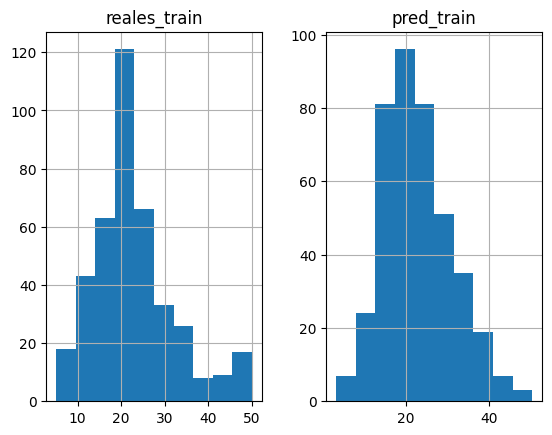

In [660]:
df_compara_train.hist()

array([[<Axes: title={'center': 'reales_test'}>,
        <Axes: title={'center': 'pred_test'}>]], dtype=object)

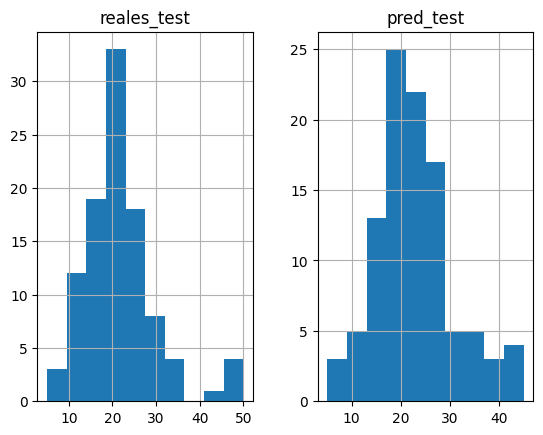

In [661]:
df_compara_test.hist()

*Las predicciones tienen una disposición más similar a la gaussiana.*

In [662]:
ridge_reg = Ridge(alpha = 15)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=15)

In [663]:

pred_ridge_train = ridge_reg.predict(X_train)
pred_ridge_test = ridge_reg.predict(X_test)

print("MAE train:", metrics.mean_absolute_error(y_train, pred_ridge_train))
print("MSE train:", metrics.mean_squared_error(y_train, pred_ridge_train))
print("RMSE train:", metrics.root_mean_squared_error(y_train, pred_ridge_train))
print("R2 train:", ridge_reg.score(X_train, y_train))

print("MAE test:", metrics.mean_absolute_error(y_test, pred_ridge_test))
print("MSE train:", metrics.mean_squared_error(y_test, pred_ridge_test))
print("RMSE test:", metrics.root_mean_squared_error(y_test, pred_ridge_test))
print("R2 test:", ridge_reg.score(X_test, y_test))

MAE train: 3.350419259274923
MSE train: 20.695007808693553
RMSE train: 4.549176607771296
R2 train: 0.7617797059214296
MAE test: 3.3766985883157252
MSE train: 21.855994208689964
RMSE test: 4.675039487393659
R2 test: 0.7019655434807148


In [664]:
df_coef = pd.DataFrame(ridge_reg.coef_, index=X_train.columns, columns= ["coeficiente"])
df_coef.sort_values("coeficiente", ascending=False)

,coeficiente
RM,2.331608
CHAS,1.873474
AGE,0.970992
RAD,0.870564
INDUS,0.264364
CRIM,0.061685
ZN,-0.599515
NOX,-0.845029
TAX,-1.163703
PTRATIO,-1.864522


,coefs
CRIM,0.061685
ZN,-0.599515
INDUS,0.264364
CHAS,1.873474
NOX,-0.845029
RM,2.331608
AGE,0.970992
RAD,0.870564
TAX,-1.163703
PTRATIO,-1.864522


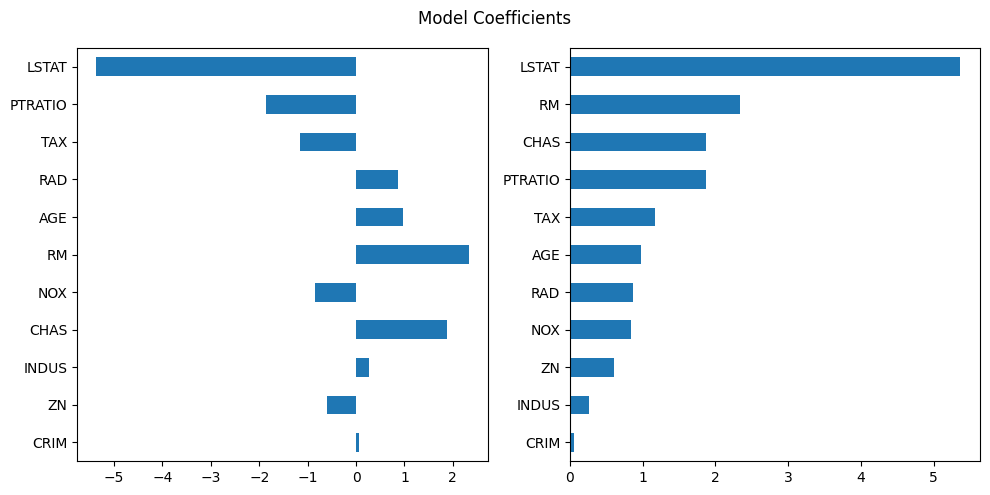

In [665]:
show_coefs(ridge_reg)

In [666]:
ridge_reg = Ridge(alpha = 7)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=7)

In [667]:

pred_ridge_train = ridge_reg.predict(X_train)
pred_ridge_test = ridge_reg.predict(X_test)

print("MAE train:", metrics.mean_absolute_error(y_train, pred_ridge_train))
print("MSE train:", metrics.mean_squared_error(y_train, pred_ridge_train))
print("RMSE train:", metrics.root_mean_squared_error(y_train, pred_ridge_train))
print("R2 train:", ridge_reg.score(X_train, y_train))

print("MAE test:", metrics.mean_absolute_error(y_test, pred_ridge_test))
print("MSE train:", metrics.mean_squared_error(y_test, pred_ridge_test))
print("RMSE test:", metrics.root_mean_squared_error(y_test, pred_ridge_test))
print("R2 test:", ridge_reg.score(X_test, y_test))

MAE train: 3.353262314281365
MSE train: 20.558805926787752
RMSE train: 4.534181946811106
R2 train: 0.7633475261736173
MAE test: 3.3555751072183324
MSE train: 21.576356328614423
RMSE test: 4.645035664945365
R2 test: 0.7057787639096158


In [668]:
df_coef = pd.DataFrame(ridge_reg.coef_, index=X_train.columns, columns= ["coeficiente"])
df_coef.sort_values("coeficiente", ascending=False)

,coeficiente
RM,2.232029
CHAS,2.229251
RAD,1.127122
AGE,1.094780
INDUS,0.357518
CRIM,0.028838
ZN,-0.620271
NOX,-0.942212
TAX,-1.351023
PTRATIO,-1.917074


,coefs
CRIM,0.028838
ZN,-0.620271
INDUS,0.357518
CHAS,2.229251
NOX,-0.942212
RM,2.232029
AGE,1.094780
RAD,1.127122
TAX,-1.351023
PTRATIO,-1.917074


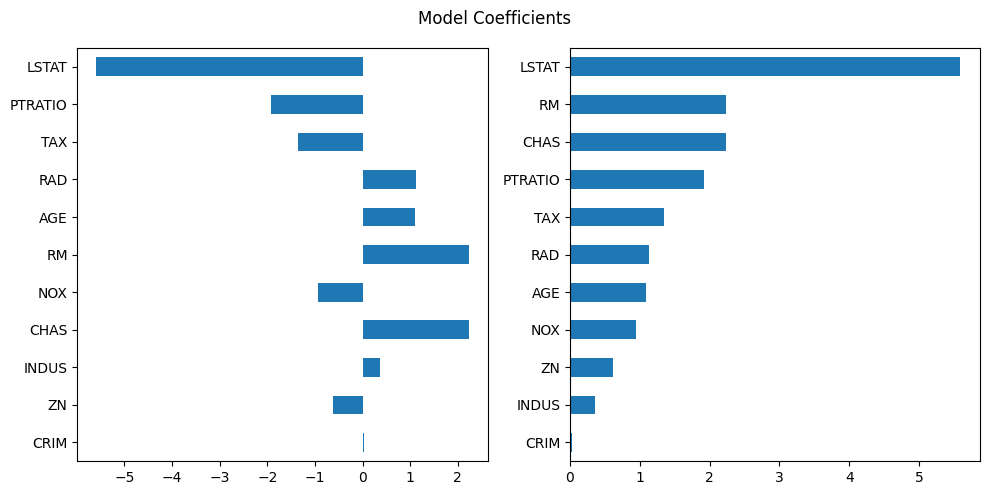

In [669]:
show_coefs(ridge_reg)

In [670]:
ridge_reg = Ridge(alpha = 6)
ridge_reg.fit(train.drop(columns=[target]), y_train)

Ridge(alpha=6)

In [671]:

pred_ridge_train = ridge_reg.predict(train.drop(columns=[target]))
pred_ridge_test = ridge_reg.predict(test.drop(columns=[target]))

print("MAE train:", metrics.mean_absolute_error(y_train, pred_ridge_train))
print("MSE train:", metrics.mean_squared_error(y_train, pred_ridge_train))
print("RMSE train:", metrics.root_mean_squared_error(y_train, pred_ridge_train))
#print("R2 train:", ridge_reg.score(X_train, y_train))

print("MAE test:", metrics.mean_absolute_error(y_test, pred_ridge_test))
print("MSE train:", metrics.mean_squared_error(y_test, pred_ridge_test))
print("RMSE test:", metrics.root_mean_squared_error(y_test, pred_ridge_test))
#print("R2 test:", ridge_reg.score(X_test, y_test))

MAE train: 3.179880982078062
MSE train: 18.324370962440014
RMSE train: 4.280697485508642
MAE test: 3.2532086471501858
MSE train: 20.134377052612166
RMSE test: 4.487134614942164


In [672]:
df_coef = pd.DataFrame(ridge_reg.coef_, index=train.drop(columns=[target]).columns, columns= ["coeficiente"])
df_coef.sort_values("coeficiente", ascending=False)

,coeficiente
CHAS,2.269719
RM,2.225948
RAD,1.283163
AGE,0.163798
ZN,-0.165078
INDUS,-0.190566
CRIM,-0.325702
TAX,-1.642393
PTRATIO,-1.735378
NOX,-1.958986


,coefs
CRIM,-0.325702
ZN,-0.165078
INDUS,-0.190566
CHAS,2.269719
NOX,-1.958986
RM,2.225948
AGE,0.163798
DIS,-3.095194
RAD,1.283163
TAX,-1.642393


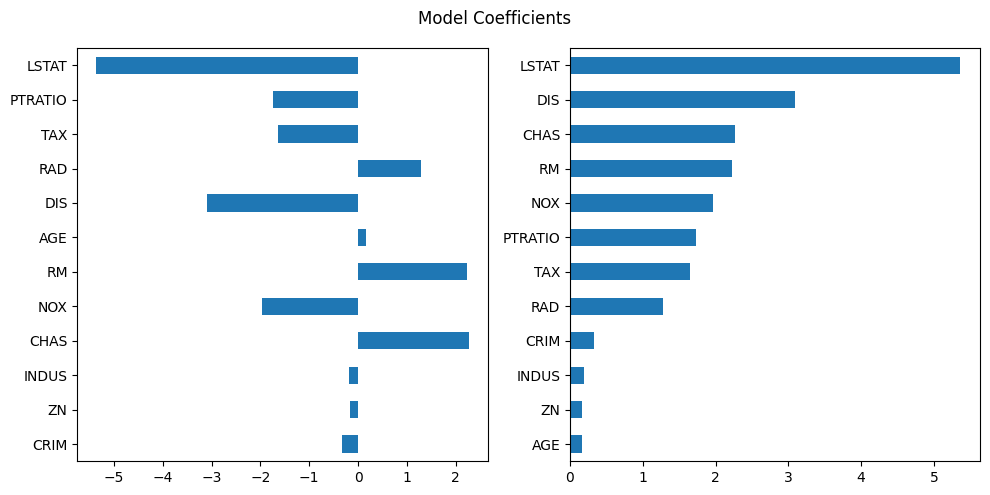

In [673]:
show_coefs(ridge_reg)

In [674]:
ridge_reg = Ridge(alpha = 4)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=4)

In [675]:

pred_ridge_train = ridge_reg.predict(X_train)
pred_ridge_test = ridge_reg.predict(X_test)

print("MAE train:", metrics.mean_absolute_error(y_train, pred_ridge_train))
print("MSE train:", metrics.mean_squared_error(y_train, pred_ridge_train))
print("RMSE train:", metrics.root_mean_squared_error(y_train, pred_ridge_train))
print("R2 train:", ridge_reg.score(X_train, y_train))

print("MAE test:", metrics.mean_absolute_error(y_test, pred_ridge_test))
print("MSE train:", metrics.mean_squared_error(y_test, pred_ridge_test))
print("RMSE test:", metrics.root_mean_squared_error(y_test, pred_ridge_test))
print("R2 test:", ridge_reg.score(X_test, y_test))

MAE train: 3.3576017668459093
MSE train: 20.524394552613522
RMSE train: 4.530385695789435
R2 train: 0.7637436356001618
MAE test: 3.344299774833375
MSE train: 21.465845132321828
RMSE test: 4.63312476977707
R2 test: 0.707285725524442


In [676]:
df_coef = pd.DataFrame(ridge_reg.coef_, index=X_train.columns, columns= ["coeficiente"])
df_coef.sort_values("coeficiente", ascending=False)

,coeficiente
CHAS,2.407604
RM,2.185934
RAD,1.257672
AGE,1.148879
INDUS,0.401600
CRIM,0.005235
ZN,-0.626810
NOX,-0.985293
TAX,-1.448156
PTRATIO,-1.939972


,coefs
CRIM,0.005235
ZN,-0.626810
INDUS,0.401600
CHAS,2.407604
NOX,-0.985293
RM,2.185934
AGE,1.148879
RAD,1.257672
TAX,-1.448156
PTRATIO,-1.939972


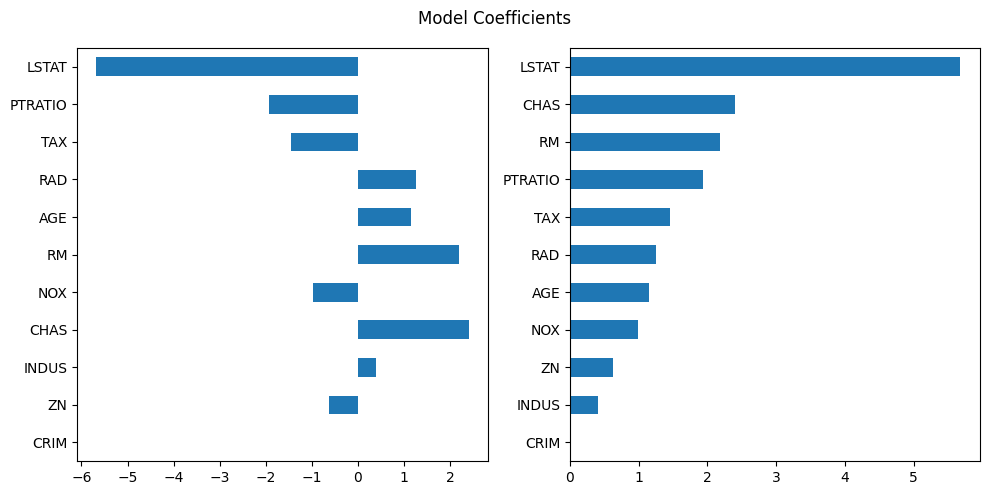

In [677]:
show_coefs(ridge_reg)

In [678]:
lasso_reg = Lasso(alpha = 0.15)
lasso_reg.fit(X_train, y_train)

pred_lasso_train = lasso_reg.predict(X_train)
pred_lasso_test = lasso_reg.predict(X_test)

print("MAE train:", metrics.mean_absolute_error(y_train, pred_lasso_train))
print("MSE train:", metrics.mean_squared_error(y_train, pred_lasso_train))
print("RMSE train:", metrics.root_mean_squared_error(y_train, pred_lasso_train))
print("R2 train:", lasso_reg.score(X_train, y_train))

print("MAE test:", metrics.mean_absolute_error(y_test, pred_lasso_test))
print("MSE train:", metrics.mean_squared_error(y_test, pred_lasso_test))
print("RMSE test:", metrics.root_mean_squared_error(y_test, pred_lasso_test))
print("R2 test:", lasso_reg.score(X_test, y_test))




MAE train: 3.4146264304619263
MSE train: 21.427087782340806
RMSE train: 4.6289402439803435
R2 train: 0.7533527312508512
MAE test: 3.475886088761347
MSE train: 22.64233618889758
RMSE test: 4.75839638837472
R2 test: 0.6912427640696416


In [679]:
df_coef = pd.DataFrame(lasso_reg.coef_, index=X_train.columns, columns= ["coeficiente"])

In [680]:
df_coef.sort_values("coeficiente", ascending=False)

,coeficiente
RM,2.289245
AGE,0.692229
CHAS,0.624464
CRIM,0.000000
INDUS,-0.000000
RAD,0.000000
NOX,-0.043342
TAX,-0.379621
ZN,-0.423868
PTRATIO,-1.544373


,coefs
CRIM,0.000000
ZN,-0.423868
INDUS,-0.000000
CHAS,0.624464
NOX,-0.043342
RM,2.289245
AGE,0.692229
RAD,0.000000
TAX,-0.379621
PTRATIO,-1.544373


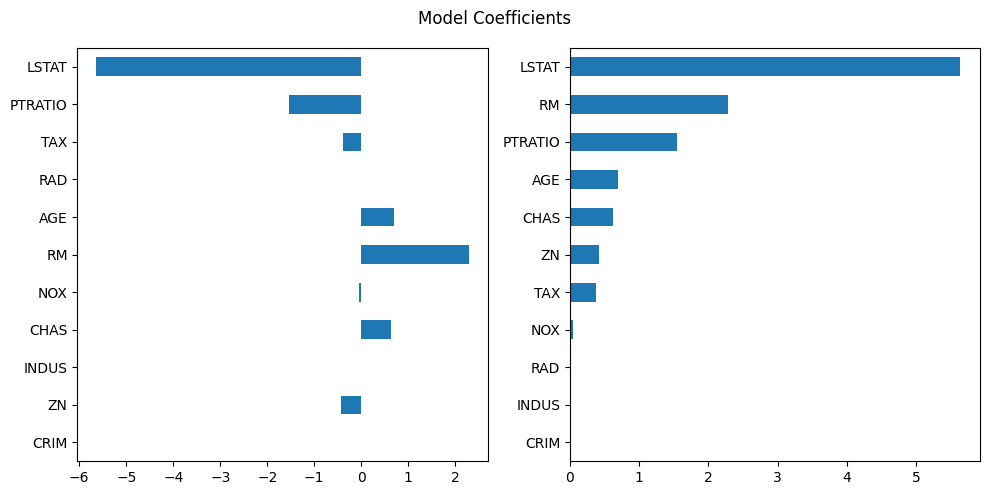

In [681]:
show_coefs(lasso_reg)

In [682]:
lasso_reg = Lasso(alpha = 0.05)
lasso_reg.fit(X_train, y_train)

pred_lasso_train = lasso_reg.predict(X_train)
pred_lasso_test = lasso_reg.predict(X_test)

print("MAE train:", metrics.mean_absolute_error(y_train, pred_lasso_train))
print("MSE train:", metrics.mean_squared_error(y_train, pred_lasso_train))
print("RMSE train:", metrics.root_mean_squared_error(y_train, pred_lasso_train))
print("R2 train:", lasso_reg.score(X_train, y_train))

print("MAE test:", metrics.mean_absolute_error(y_test, pred_lasso_test))
print("MSE train:", metrics.mean_squared_error(y_test, pred_lasso_test))
print("RMSE test:", metrics.root_mean_squared_error(y_test, pred_lasso_test))
print("R2 test:", lasso_reg.score(X_test, y_test))




MAE train: 3.3741052039796613
MSE train: 20.66640645773058
RMSE train: 4.546031946404533
R2 train: 0.7621089361541711
MAE test: 3.3748787481913123
MSE train: 21.73976440626736
RMSE test: 4.662592026573562
R2 test: 0.7035504856098901


In [683]:
df_coef = pd.DataFrame(lasso_reg.coef_, index=X_train.columns, columns= ["coeficiente"])

In [684]:
df_coef.sort_values("coeficiente", ascending=False)

,coeficiente
RM,2.172336
CHAS,2.075859
AGE,1.057126
RAD,0.719290
INDUS,0.087435
CRIM,0.000000
ZN,-0.603097
NOX,-0.634192
TAX,-0.910563
PTRATIO,-1.799206


,coefs
CRIM,0.000000
ZN,-0.603097
INDUS,0.087435
CHAS,2.075859
NOX,-0.634192
RM,2.172336
AGE,1.057126
RAD,0.719290
TAX,-0.910563
PTRATIO,-1.799206


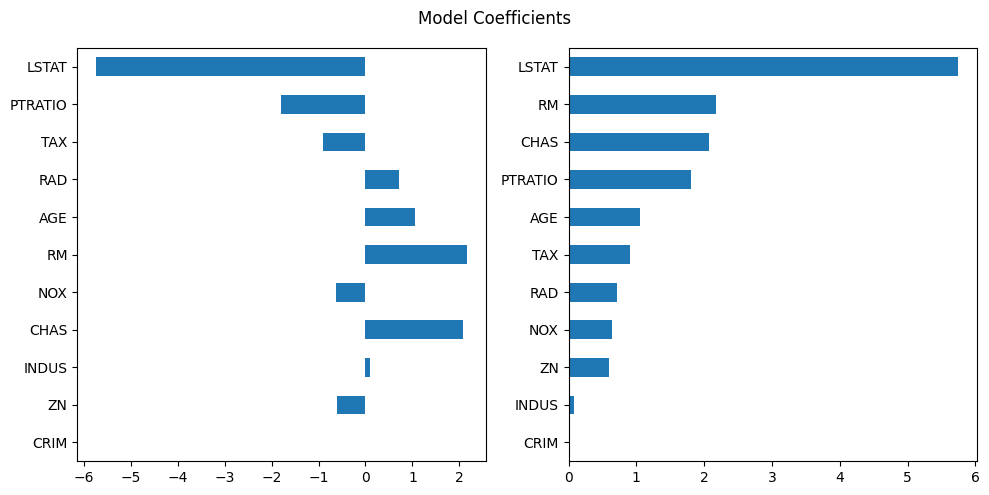

In [685]:
show_coefs(lasso_reg)

In [686]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.7)
elastic_net.fit(X_train, y_train)
pred_elastic_train = elastic_net.predict(X_train)
pred_elastic_test = elastic_net.predict(X_test)

print("MAE train:", metrics.mean_absolute_error(y_train, pred_elastic_train))
print("MSE train:", metrics.mean_squared_error(y_train, pred_elastic_train))
print("RMSE train:", metrics.root_mean_squared_error(y_train, pred_elastic_train))
print("R2 train:", elastic_net.score(X_train, y_train))

print("MAE test:", metrics.mean_absolute_error(y_test, pred_elastic_test))
print("MSE train:", metrics.mean_squared_error(y_test, pred_elastic_test))
print("RMSE test:", metrics.root_mean_squared_error(y_test, pred_elastic_test))
print("R2 test:", elastic_net.score(X_test, y_test))

MAE train: 3.3735494407451796
MSE train: 21.057495623957347
RMSE train: 4.588844693815356
R2 train: 0.7576071076431257
MAE test: 3.426232747836462
MSE train: 22.37553707600651
RMSE test: 4.73027875246338
R2 test: 0.6948809114744712


*Con los tres modelos regularizados se consigue una precisión similar, que es 0,1 mayor que en el modelo sin regularizar al aplicarlos a test. Esto significa que se acercan en cada predicción del precio medio de la vivienda en una zona en 100€ más que el modelo no regularizado. Esto no es una diferencia demasiado grande, pero si tuviera que quedarme con uno el más preciso parece el regularizado con ridge.*

*En un principio había quitado varias features que tenían muchas correlaciones altas, pero lo que mejor resultado me ha dado ha sido quitar solo TAX.*